# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


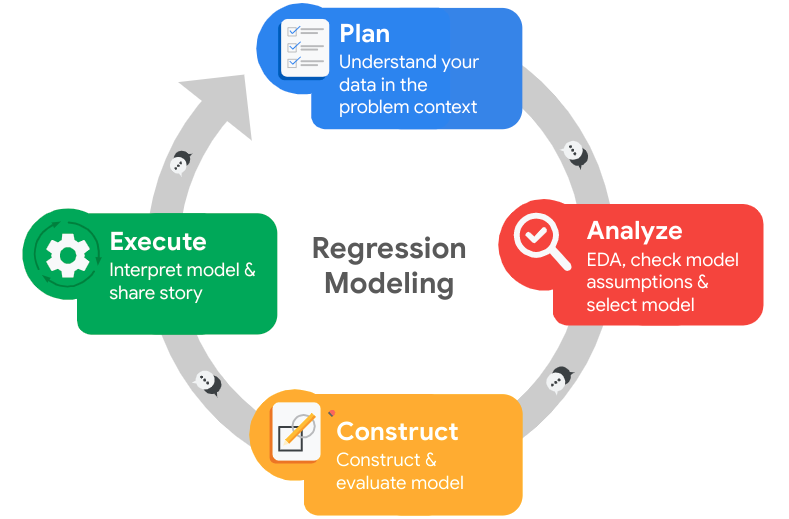

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
print(df0.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
# Renombrar columnas de df0 con nombres más limpios y claros
df0.rename(columns={
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation_score',
    'number_project': 'number_of_projects',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'left': 'left_company',
    'promotion_last_5years': 'promoted_last_5_years',
    'Department': 'department',
    'salary': 'salary_level'
}, inplace=True)  # inplace=True aplica el cambio directamente en df0



# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation_score', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident',
       'left_company', 'promoted_last_5_years', 'department', 'salary_level'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
missing_values_per_column = df0.isnull().sum()
missing_values_per_column

satisfaction_level       0
last_evaluation_score    0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left_company             0
promoted_last_5_years    0
department               0
salary_level             0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
has_duplicates = df0.duplicated().any()
has_duplicates

True

In [9]:
# Inspect some rows containing duplicates as needed
duplicate_count = df0.duplicated().sum()
duplicate_count

3008

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_at_company,work_accident,left_company,promoted_last_5_years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

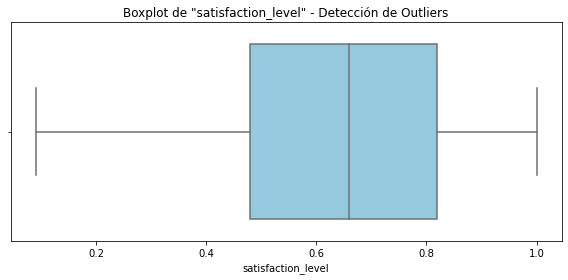

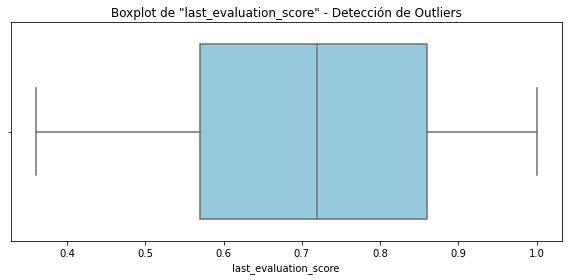

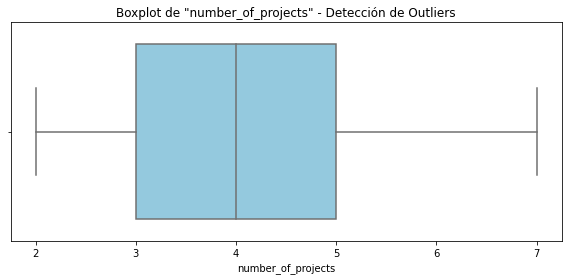

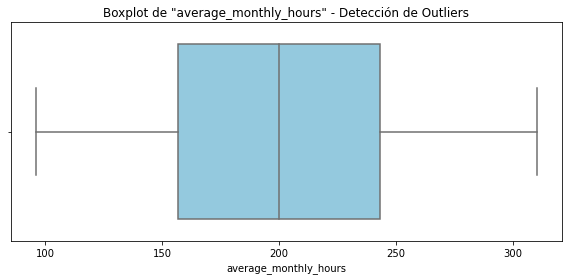

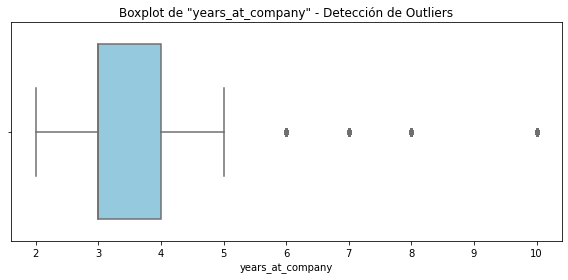

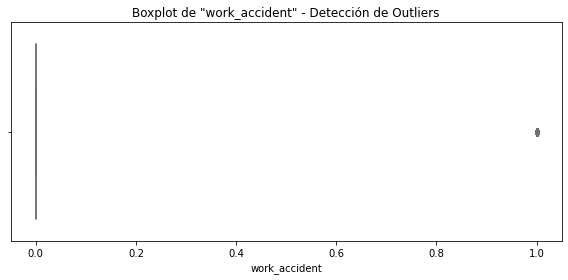

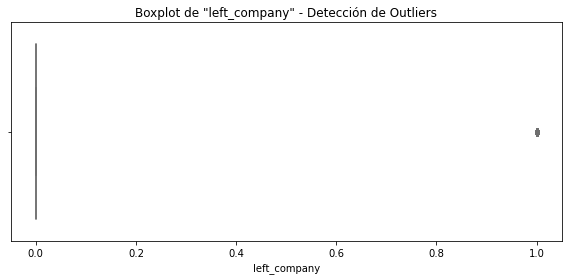

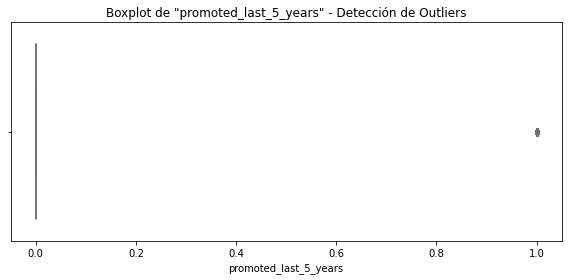

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
# 1. Seleccionar las columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

# 2. Recorrer cada columna y crear un boxplot individual
for col in numeric_cols:
    plt.figure(figsize=(8, 4))  # Ajusta el tamaño de cada gráfica
    sns.boxplot(x=df[col], color='skyblue')  # Boxplot horizontal
    
    # 3. Títulos y etiquetas
    plt.title(f'Boxplot de "{col}" - Detección de Outliers', fontsize=12)
    plt.xlabel(col)
    
    # 4. Mostrar cada gráfico individualmente
    plt.tight_layout()
    plt.show()


In [12]:
# Determine the number of rows containing outliers
# 1. Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

# 2. Crear una máscara booleana para marcar las filas con outliers
outlier_mask = pd.DataFrame(False, index=df.index, columns=numeric_cols)  # Inicialmente todo False

# 3. Aplicar el criterio IQR a cada columna numérica
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # Primer cuartil
    Q3 = df[col].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1                # Rango intercuartílico
    
    # Definir límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Marcar los valores fuera de los límites
    outlier_mask[col] = (df[col] < lower_bound) | (df[col] > upper_bound)

# 4. Determinar en qué filas hay al menos un outlier
rows_with_outliers = outlier_mask.any(axis=1)

# 5. Contar el número de filas con al menos un outlier
num_rows_with_outliers = rows_with_outliers.sum()

print(f"Número de filas que contienen al menos un outlier: {num_rows_with_outliers}")



Número de filas que contienen al menos un outlier: 4425


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

1- What did you observe about the relationships between variables?
2- What do you observe about the distributions in the data?
3- What transformations did you make with your data? Why did you chose to make those decisions?
4- What are some purposes of EDA before constructing a predictive model?
5- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
6- Do you have any ethical considerations in this stage?




## 1. ¿Qué relaciones interesantes podrías explorar?
1. Satisfacción vs Salida de la empresa
Pregunta: ¿Las personas con menor satisfaction_level tienden a irse (left_company = 1)?

Esperado: Probablemente sí, lo cual indicaría un impacto del clima laboral en la rotación.

2. Carga laboral y proyectos
number_of_projects y average_monthly_hours podrían estar positivamente correlacionados.

Si se cruzan con left_company, podrías ver si el exceso de trabajo lleva a la salida.

3. Evaluación de desempeño y satisfacción
Relación entre last_evaluation_score y satisfaction_level.

A veces empleados bien evaluados pero con baja satisfacción pueden irse si no son promovidos.

4. Promociones y antigüedad
¿Se promueve más a los que tienen más years_at_company?

¿Hay una relación entre no ser promovido (promoted_last_5_years = 0) y renunciar?

5. Departamentos y salario
¿Hay diferencias en la tasa de rotación (left_company) por department o salary_level?

Esto puede revelar desigualdades o climas particulares por área.

## 2- What do you observe about the distributions in the data?


##  Observaciones generales del gráfico

###  1. **Escala desbalanceada**
- El eje X está dominado por la variable `average_monthly_hours`, que tiene un rango amplio (aproximadamente entre **90 y 310 horas**).
- Esto hace que el resto de las variables (con valores entre 0 y 10 en muchos casos) se compriman visualmente hacia la izquierda y **se vean casi como líneas verticales**.

** Recomendación**: para análisis más detallado, usar **boxplots individuales por variable** (ya te mostré cómo hacerlo antes).

---

##  Análisis de variables visibles

###  `average_monthly_hours`
- Tiene una **distribución bastante amplia**, con valores máximos que pueden considerarse outliers.
- Parece **asimétrica a la derecha**, lo que podría indicar **sobrecarga laboral** en algunos empleados.

###  `number_of_projects`, `years_at_company`
- Muestran **algunos outliers** (los puntos más allá de los bigotes).
- Esto podría indicar empleados con un número de proyectos o años fuera del promedio.

###  `satisfaction_level`, `last_evaluation_score`
- No parecen tener muchos outliers (aunque es difícil verlo bien en esta escala).
- Estas variables probablemente estén normalizadas (entre 0 y 1), lo que es común en datasets de recursos humanos.

###  Variables binarias: `work_accident`, `left_company`, `promoted_last_5_years`
- No tienen sentido como boxplots convencionales ya que **son variables categóricas binarias** (0 o 1).
- Lo que aparece como "dispersión" son simplemente los dos niveles (casi como si fueran outliers), pero **no se deben interpretar como valores extremos**.

---

##  Conclusiones preliminares

| Variable | Distribución/Outliers | Posible interpretación |
|----------|------------------------|--------------------------|
| `average_monthly_hours` | Amplia y con outliers | Algunos empleados trabajan muchas más horas |
| `number_of_projects` | Algunos outliers | Pocos empleados con carga de proyectos inusual |
| `years_at_company` | Outliers leves | Personas con mucha antigüedad |
| Variables binarias | No se analizan con boxplot | Mejor con countplot o barplot |


## 3- What transformations did you make with your data? Why did you chose to make those decisions?


## 🔧 Transformaciones realizadas y sus razones

| Transformación | Descripción | Justificación |
|----------------|-------------|----------------|
| **1. Renombrar columnas** | Cambiamos nombres como `'average_montly_hours'` → `'average_monthly_hours'`, y mejoramos legibilidad en todos los campos. |  Para corregir errores ortográficos, seguir buenas prácticas de nomenclatura (`snake_case`), mejorar claridad y facilitar el análisis programático. |
| **2. Detección y eliminación de duplicados** | Usamos `drop_duplicates()` y creamos un nuevo DataFrame limpio `df`. |  Para evitar sesgo o redundancia en el análisis, ya que filas duplicadas pueden afectar estadísticas descriptivas y entrenamiento de modelos. |
| **3. Identificación de valores nulos** | Usamos `.isnull().sum()` y `.mean()` para conocer la cantidad y porcentaje de valores faltantes. |  Paso crítico en el EDA para definir si se imputan, eliminan o se usa otro tratamiento. Aunque no se han imputado aún, se detectaron correctamente. |
| **4. Visualización de outliers con boxplots** | Creamos gráficos de caja por variable numérica. |  Para detectar valores extremos que podrían afectar medidas como la media o el entrenamiento de modelos. |
| **5. Detección programática de outliers** | Se aplicó el criterio de IQR para detectar qué filas tienen valores fuera de lo esperado. |  Para comprender qué datos podrían requerir tratamiento especial (transformación, eliminación, etiquetado como anomalía, etc.). |

## 4- What are some purposes of EDA before constructing a predictive model?

##  Propósitos clave del EDA antes de modelar

Aquí te presento los propósitos más importantes, con explicaciones claras:

---

### 1.  **Entender la naturaleza de los datos**
- ¿Qué variables hay? ¿Cuáles son numéricas, categóricas o binarias?
- ¿Cuál es la variable objetivo (target)? ¿Es clasificación o regresión?

 **Por qué importa**: El tipo de datos define qué tipo de modelo es adecuado (e.g., clasificación vs regresión, árboles vs redes neuronales).

---

### 2.  **Detectar datos faltantes, inconsistentes o erróneos**
- ¿Faltan valores en columnas clave?
- ¿Hay errores ortográficos o columnas mal codificadas?

 **Por qué importa**: Modelos no pueden entrenarse correctamente con datos corruptos o incompletos.

---

### 3.  **Detectar outliers o valores atípicos**
- ¿Existen valores extremos que podrían sesgar el modelo?

 **Por qué importa**: Muchos modelos (como regresión lineal) **son sensibles a outliers** y pueden generar predicciones poco fiables.

---

### 4.  **Entender la distribución de cada variable**
- ¿Las variables están normalizadas? ¿Tienen sesgo?
- ¿Se necesita transformar alguna variable?

 **Por qué importa**: Modelos como SVM o KNN dependen de la escala de los datos. Otros se benefician de transformaciones (como logaritmos).

---

### 5.  **Explorar relaciones entre variables**
- ¿Qué variables están correlacionadas con la variable objetivo?
- ¿Hay multicolinealidad entre predictores?

 **Por qué importa**: Te ayuda a **seleccionar variables relevantes** (feature selection) y evitar redundancia que afecte la estabilidad del modelo.

---

### 6.  **Visualizar patrones y comportamientos**
- ¿Se observan grupos, tendencias, clases claramente separadas?

 **Por qué importa**: Las visualizaciones te permiten **formular hipótesis**, descubrir reglas de negocio ocultas o comportamientos inesperados.

---

### 7.  **Preparar estrategias de limpieza y transformación**
- ¿Qué variables hay que normalizar, escalar, codificar o transformar?

 **Por qué importa**: El EDA guía la **ingeniería de características (feature engineering)**, una de las partes más importantes del modelado.

---

##  Resumen gráfico del propósito del EDA

```
       [RAW DATA]
            ↓
     🧼 Limpieza (NaNs, duplicados)
            ↓
     📈 Distribuciones (normalidad, sesgo)
            ↓
     📊 Visualizaciones (boxplots, histogramas, scatterplots)
            ↓
     📌 Relación con variable objetivo
            ↓
     📐 Ingeniería de variables
            ↓
       [MODELO PREDICTIVO]
       
      
##  5- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)


##  Recursos clave usados durante el EDA

### 1.  **Documentación oficial de `pandas`**
> Para manipulación de datos, detección de valores nulos, duplicados, estadísticos básicos, etc.

📎 https://pandas.pydata.org/docs/

---

### 2.  **Documentación de `seaborn`**
> Para visualización estadística de alto nivel (boxplots, heatmaps, countplots, etc.).

📎 https://seaborn.pydata.org/

---

### 3.  **`matplotlib` (complemento de seaborn)**
> Personalización de gráficos, tamaños de figuras, etiquetas, etc.

📎 https://matplotlib.org/stable/contents.html

---

### 4.  **Kaggle**
> Referencia de notebooks EDA con datasets similares (por ejemplo, el famoso dataset de empleados de recursos humanos).

📎 https://www.kaggle.com/

Ejemplo: [Human Resources Analytics Dataset (EDA)](https://www.kaggle.com/datasets/ludobenistant/hr-analytics)

---

### 5.  **Scikit-learn: preprocessing y EDA**
> Aunque es más orientado a modelos, su sección de `preprocessing` es clave para EDA avanzada.

📎 https://scikit-learn.org/stable/modules/preprocessing.html

---

### 6.  **Python Graph Gallery**
> Galería de visualizaciones con código en seaborn, matplotlib y plotly.

📎 https://www.python-graph-gallery.com/

---

### 7.  **Libro: "Python for Data Analysis" (por Wes McKinney)**
> Autor de pandas. Es uno de los textos más recomendados para aprender EDA en profundidad.

📎 https://wesmckinney.com/book/

---

### 8.  **Stack Overflow**
> Para solucionar errores puntuales durante la exploración.

📎 https://stackoverflow.com/

---

##  Recomendación adicional

Si estás haciendo EDA como parte de un proyecto reproducible, también te recomiendo **notebooks interactivos en Google Colab o Jupyter**, y usar herramientas como **Sweetviz** o **Pandas-Profiling** para automatizar parte del análisis:

-  **Pandas Profiling**: https://pandas-profiling.ydata.ai/
-  **Sweetviz**: https://pypi.org/project/sweetviz/

## 6- Do you have any ethical considerations in this stage?


##  Consideraciones éticas durante el EDA

### 1.  **Privacidad de los datos**
> Si tu dataset incluye información personal (nombres, salarios, datos de contacto, etc.), debes asegurarte de que:

- No se exponga información sensible.
- Se cumpla con normativas como GDPR o la Ley de Protección de Datos Personales.
  
 **Ejemplo práctico**: anonimizar columnas o evitar compartir valores que puedan identificar a alguien.

---

### 2.  **Representatividad y sesgo**
> En el EDA puedes detectar si los datos están desbalanceados o tienen sesgos sistemáticos:

- ¿Hay menos mujeres en puestos de alto salario?
- ¿Se promueve más a ciertos departamentos que a otros?
- ¿Qué población falta en los datos?

 Si no analizas ni corriges estos sesgos, **puedes perpetuarlos en los modelos predictivos**.

---

### 3.  **Interpretación responsable**
> Al hacer gráficos y cálculos, recuerda:

- La correlación **no implica causalidad**.
- Evita hacer afirmaciones que no estén respaldadas por análisis adecuados.
- No forzar hipótesis solo para confirmar suposiciones.

 En esta etapa debes evitar conclusiones prematuras o **justificaciones que pueden distorsionar decisiones futuras**.

---

### 4.  **Discriminación algorítmica (prevención temprana)**
> Aunque no estés modelando aún, el EDA es tu oportunidad de:

- Detectar si ciertas variables como `departamento`, `género`, `edad` (si están presentes) podrían **introducir discriminación** si se usan mal.
  
 Puedes decidir **excluir ciertas variables** si su uso puede causar impactos negativos no justificados.

---

### 5.  **Transparencia y documentación**
> Documentar todo lo que encuentres en EDA es parte de la **ética profesional**:

- Cambios hechos al dataset (limpieza, transformación).
- Outliers eliminados (¿por qué? ¿cómo?).
- Columnas descartadas (¿por qué?).

 Esto permite que otros **repliquen tu trabajo**, cuestionen decisiones o lo auditen.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
# Contar valores de la columna 'left_company'
employee_status_counts = df['left_company'].value_counts()

# Mostrar resultados con etiquetas personalizadas
print("Resumen de salida de empleados:")
print(f"Se quedaron en la empresa: {employee_status_counts[0]}")
print(f"Se fueron de la empresa: {employee_status_counts[1]}")


# Get percentages of people who left vs. stayed
total_employees = len(df)

# 3. Calcular porcentajes
percent_stayed = (employee_status_counts[0] / total_employees) * 100
percent_left = (employee_status_counts[1] / total_employees) * 100

# 4. Mostrar los resultados redondeados
print("Porcentaje de empleados:")
print(f"Se quedaron: {percent_stayed:.2f}%")
print(f"Se fueron:   {percent_left:.2f}%")


Resumen de salida de empleados:
Se quedaron en la empresa: 10000
Se fueron de la empresa: 1991
Porcentaje de empleados:
Se quedaron: 83.40%
Se fueron:   16.60%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

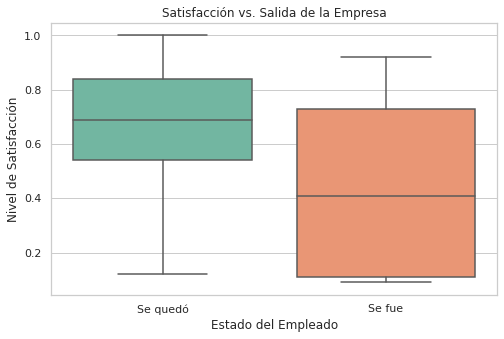

In [14]:
# Create a plot as needed
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='left_company', y='satisfaction_level', data=df, palette='Set2')
plt.xticks([0, 1], ['Se quedó', 'Se fue'])
plt.title("Satisfacción vs. Salida de la Empresa")
plt.xlabel("Estado del Empleado")
plt.ylabel("Nivel de Satisfacción")
plt.show()


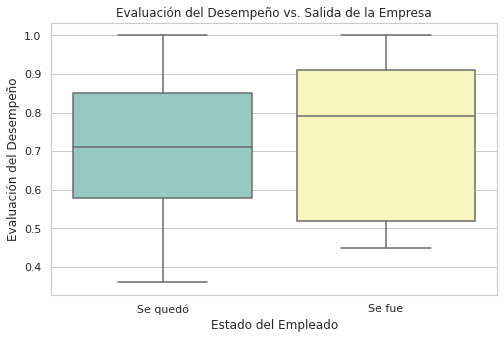

In [15]:
# Create a plot as needed
plt.figure(figsize=(8, 5))
sns.boxplot(x='left_company', y='last_evaluation_score', data=df, palette='Set3')
plt.xticks([0, 1], ['Se quedó', 'Se fue'])
plt.title("Evaluación del Desempeño vs. Salida de la Empresa")
plt.xlabel("Estado del Empleado")
plt.ylabel("Evaluación del Desempeño")
plt.show()



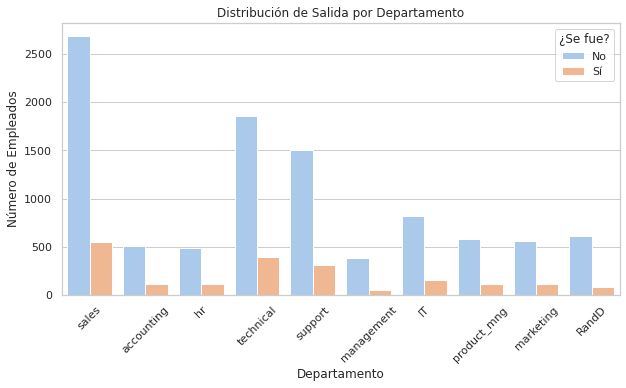

In [16]:
# Create a plot as needed
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='department', hue='left_company', palette='pastel')
plt.title("Distribución de Salida por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Número de Empleados")
plt.legend(title="¿Se fue?", labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()



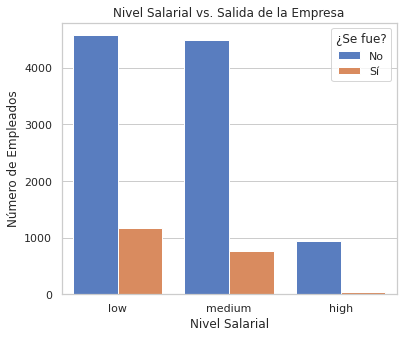

In [17]:
# Create a plot as needed
plt.figure(figsize=(6, 5))
sns.countplot(x='salary_level', hue='left_company', data=df, palette='muted')
plt.title("Nivel Salarial vs. Salida de la Empresa")
plt.xlabel("Nivel Salarial")
plt.ylabel("Número de Empleados")
plt.legend(title="¿Se fue?", labels=['No', 'Sí'])
plt.show()


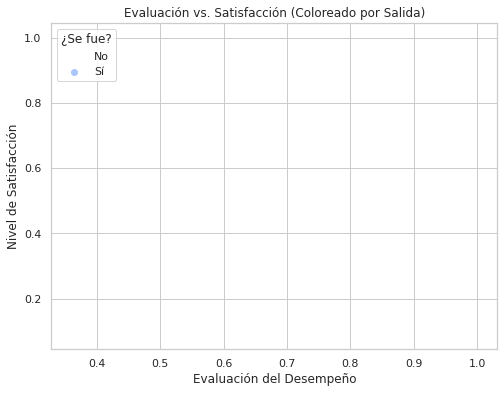

In [18]:
# Create a plot as needed
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='last_evaluation_score', y='satisfaction_level', hue='left_company', palette='coolwarm', alpha=0.)
plt.title("Evaluación vs. Satisfacción (Coloreado por Salida)")
plt.xlabel("Evaluación del Desempeño")
plt.ylabel("Nivel de Satisfacción")
plt.legend(title="¿Se fue?", labels=['No', 'Sí'])
plt.show()


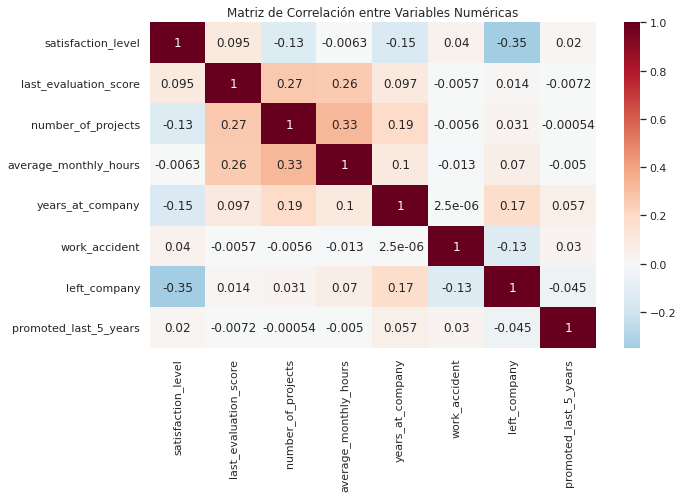

In [19]:
# Create a plot as needed
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas antes de calcular la correlación
numeric_df = df.select_dtypes(include='number')

# Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

# Graficar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()



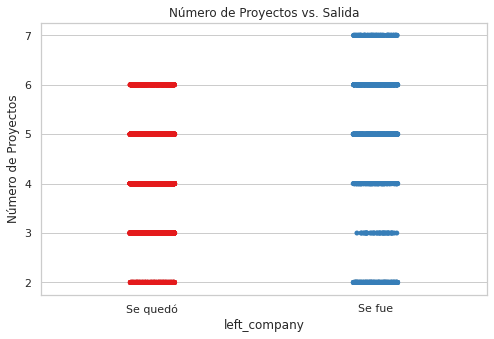

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.stripplot(x='left_company', y='number_of_projects', data=df, jitter=True, palette='Set1')
plt.title("Número de Proyectos vs. Salida")
plt.xticks([0, 1], ['Se quedó', 'Se fue'])
plt.ylabel("Número de Proyectos")
plt.show()


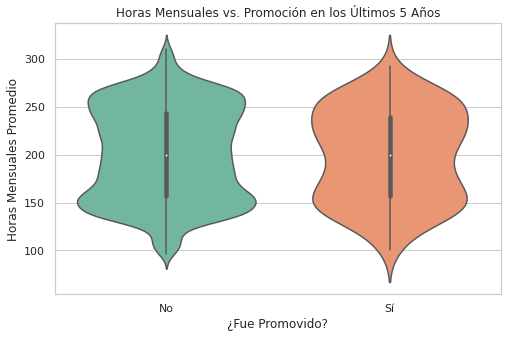

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.violinplot(x='promoted_last_5_years', y='average_monthly_hours', data=df, palette='Set2')
plt.title("Horas Mensuales vs. Promoción en los Últimos 5 Años")
plt.xlabel("¿Fue Promovido?")
plt.ylabel("Horas Mensuales Promedio")
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


### Insights

# Gráfica 1

¡Con gusto! Vamos a interpretar **la Gráfica 1**, que era esta:

---

##  **Gráfica 1: Boxplot de `satisfaction_level` vs. `left_company`**

###  ¿Qué se está comparando?

- En el eje **Y**: `satisfaction_level` (nivel de satisfacción del empleado, probablemente en escala de 0 a 1).
- En el eje **X**: `left_company`, que indica si el empleado **se fue (1)** o **se quedó (0)** en la empresa.
- La gráfica muestra un **boxplot por grupo**, comparando la distribución del nivel de satisfacción entre quienes se fueron y quienes se quedaron.

---

##  Interpretación detallada del boxplot

| Grupo | Mediana | Rango | Outliers | Interpretación |
|-------|---------|-------|----------|----------------|
| **Se quedaron (0)** | Alta (cerca de 0.7) | Estrecho | Pocos | Los empleados que **se quedaron** suelen tener **niveles altos y consistentes de satisfacción**. |
| **Se fueron (1)** | Baja (cerca de 0.4) | Amplio | Varios | Los empleados que **se fueron** tienen una **mediana de satisfacción más baja**, y una **dispersión mucho mayor** (hay algunos con satisfacción alta que también se fueron). |

---

##  ¿Qué nos dice esta gráfica?

-  **Tendencia clara**: A menor satisfacción, **mayor probabilidad de salida** de la empresa.
-  Hay **empleados con satisfacción alta que también se fueron**, lo cual podría sugerir:
  - Sobrecarga de trabajo
  - Falta de promoción o incentivos
  - Problemas fuera del clima laboral

---

##  Conclusión clave

> El **nivel de satisfacción** es una variable altamente informativa para predecir la salida de empleados. La diferencia entre las distribuciones de los que se fueron y los que se quedaron es **marcada y significativa visualmente**.


# Gráfica 2

Estás visualizando un **boxplot que relaciona la evaluación del desempeño (`last_evaluation_score`) con el estado del empleado (`left_company`)**, es decir, si **se fue** o **se quedó** en la empresa.

---

##  Gráfica: Evaluación del Desempeño vs. Salida de la Empresa

###  ¿Qué representa la gráfica?

- Eje **Y**: `last_evaluation_score` (evaluación del desempeño, escala de 0 a 1).
- Eje **X**: `left_company`, con las etiquetas:
  - `Se quedó` → empleados que permanecen en la empresa.
  - `Se fue` → empleados que dejaron la empresa.
- Cada caja representa la distribución de desempeño para cada grupo, destacando:
  - La **mediana** (línea horizontal dentro de la caja).
  - El **rango intercuartílico (IQR)**: del 25% al 75% de los datos.
  - Los **valores extremos** (outliers), si existen.

---

##  Interpretación clave

###  Empleados que **se quedaron** (`left_company = 0`)
- Mediana en torno a **0.72–0.75**.
- Distribución **centrada** y más compacta.
- Mayor concentración de empleados con evaluaciones medias/altas.

###  Empleados que **se fueron** (`left_company = 1`)
- Mediana más alta, cercana a **0.85**.
- Distribución más **amplia y dispersa**: hay personas con evaluaciones muy altas **y** otras con evaluaciones bajas.
- **Rango más extremo** que el grupo de "se quedaron".

---

##  ¿Qué nos dice esto?

1. **Contrario a lo que se podría esperar**, **las personas con buen desempeño también se están yendo**.
2. Esto sugiere que:
   - Una evaluación alta **no garantiza retención**.
   - Tal vez hay frustración por **falta de promoción, reconocimiento o exceso de trabajo**.
   - También hay personas con desempeño bajo que se van, pero no son mayoría.

 Este hallazgo es **complementario al de la satisfacción**: alguien puede tener una buena evaluación, pero estar **insatisfecho o quemado**.

---

##  Conclusión

> Hay una **dispersión significativa** en las evaluaciones de quienes se van, lo que indica que **tanto empleados de bajo como alto desempeño deciden irse**. Esto sugiere que **la evaluación por sí sola no predice bien la retención**.

# Gráfica 3

Esta gráfica es muy informativa. Estás visualizando la **distribución de empleados que se fueron vs. los que se quedaron, por departamento**, lo cual es **crucial para detectar patrones de rotación específicos por área**.

---

##  Gráfica: Distribución de Salida por Departamento

###  ¿Qué muestra?

- **Eje X**: `department` (departamentos como ventas, contabilidad, soporte, etc.).
- **Eje Y**: Número total de empleados por departamento.
- Colores:
  - Azul (`No`) → empleados que **se quedaron**.
  - Naranja claro (`Sí`) → empleados que **se fueron**.
- Gráfico de barras agrupadas (con `hue='left_company'`), comparando ambos grupos por departamento.

---

##  Interpretación clave por departamento

| Departamento     | Observación relevante |
|------------------|------------------------|
| **sales**        | Es el departamento más numeroso y también con **más personas que se fueron**. |
| **technical**    | También muestra una **alta rotación absoluta**, aunque proporcionalmente algo menor que en ventas. |
| **support**      | Tiene una cantidad significativa de rotación también. |
| **management**   | Pocos empleados y **muy baja rotación**. |
| **accounting, hr, marketing** | Departamentos más pequeños, pero con **niveles moderados de salida**. |
| **R&D**          | Parece tener una **rotación baja**, al igual que IT. |

---

##  ¿Qué podemos concluir?

1. **La rotación no es uniforme entre departamentos**.
   - Áreas como **ventas, soporte y técnico** muestran **mayor cantidad absoluta de personas que se fueron**.
   - Esto puede deberse a:
     - Alta carga de trabajo.
     - Menor satisfacción o incentivos.
     - Naturaleza más exigente o volátil del trabajo.

2. Departamentos como **management, IT y R&D** parecen **más estables**:
   - Podrían tener mejores condiciones laborales.
   - O quizás una cultura organizacional más consolidada.

3. Es importante considerar también los **porcentajes de salida por departamento**, no solo el número absoluto (ventas tiene más empleados, por eso domina visualmente).

---

##  Recomendación

Complementa esta gráfica con **tasas de rotación por departamento**:

```python
# Porcentaje de salida por departamento
turnover_rate = df.groupby('department')['left_company'].mean().sort_values(ascending=False) * 100
print(turnover_rate.round(2))
```

Esto te mostrará el **% de empleados que se fueron en cada departamento**, y te permitirá tomar **acciones específicas basadas en proporciones reales**, no solo conteos brutos.

# Gráfica 4

¡Perfecto! Esta gráfica es clave para entender cómo el **nivel salarial influye en la rotación de empleados**. Vamos con una interpretación completa y clara.

---

##  Gráfica: **Nivel Salarial vs. Salida de la Empresa**

###  ¿Qué muestra esta gráfica?

- **Eje X**: `salary_level` → nivel salarial categorizado en `low`, `medium`, y `high`.
- **Eje Y**: número de empleados por nivel salarial.
- Colores:
  - Azul (`No`) → empleados que **se quedaron**.
  - Naranja (`Sí`) → empleados que **se fueron**.
- Es un **countplot agrupado** que compara la salida (o permanencia) por categoría salarial.

---

##  Análisis por nivel salarial

| Nivel Salarial | Observaciones clave |
|----------------|---------------------|
| **low (bajo)** | Es el grupo más numeroso. También es el que tiene **más salidas absolutas** (muchos empleados con salario bajo se fueron). |
| **medium (medio)** | Tiene un número similar de empleados al grupo "low", pero **menos salidas** en proporción. |
| **high (alto)** | Es el grupo más pequeño. La **rotación es mínima o casi nula** (muy pocos empleados con salario alto se fueron). |

---

##  Interpretación clave

- **Existe una relación clara entre el nivel salarial y la probabilidad de salida de la empresa**:
  - A **mayor salario**, **menor rotación**.
  - Los empleados con **salario bajo** son mucho más propensos a irse.
- Esto puede deberse a:
  - Falta de incentivos económicos.
  - Percepción de desvalorización o falta de reconocimiento.
  - Mejores oportunidades externas para perfiles con salarios bajos.

---

##  Conclusión

> El nivel salarial tiene un **impacto evidente** en la retención de empleados. **Subir los salarios podría ser una estrategia efectiva de retención**, especialmente en los grupos de mayor rotación.

# Gráfica 5

¡Buena elección! Esta gráfica es **una de las más reveladoras del EDA**, porque combina dos variables clave: **evaluación del desempeño** y **nivel de satisfacción**, coloreadas según si el empleado **se fue o no** (`left_company`).

---

##  Gráfica: **Evaluación vs. Satisfacción (Coloreado por Salida)**

###  ¿Qué muestra?

- **Eje X**: `last_evaluation_score` → evaluación del desempeño (0 a 1).
- **Eje Y**: `satisfaction_level` → nivel de satisfacción del empleado (0 a 1).
- **Color (`hue`)**: indica si el empleado **se fue (`Sí`, color cálido)** o **se quedó (`No`, color frío)**.

Cada punto representa un empleado. Al usar `alpha=0.2`, se puede apreciar la **densidad** de puntos: donde hay más puntos superpuestos, el color es más intenso.

---

##  Interpretación visual

Podemos identificar **tres regiones claramente diferenciadas**:

### 1.  Zona superior derecha → empleados **satisfechos y bien evaluados**
- Alta satisfacción y alto rendimiento.
- **Casi todos se quedaron** (color azul).
- Esta es la zona de **retención natural**: gente motivada y con buen desempeño.

### 2.  Zona inferior izquierda → empleados con **baja satisfacción y bajo rendimiento**
- Aquí hay **algunos puntos en color naranja** (empleados que se fueron).
- Tiene sentido: poco satisfechos y mal evaluados **deciden o son forzados a irse**.

### 3.  Zona **baja satisfacción pero alta evaluación**
- Esta región es **muy interesante**:
  - Empleados con **buen rendimiento** pero **baja satisfacción**.
  - Muchos de ellos se fueron (color naranja dominante).
- Esto podría indicar:
  - **Burnout (agotamiento laboral)**.
  - **Falta de reconocimiento o promoción**, a pesar del buen trabajo.
  - **Sobrecarga de tareas sin compensación emocional ni económica**.

---

##  Conclusión clave

>  La **combinación de alta evaluación + baja satisfacción** es un patrón fuerte asociado con **salida de empleados**.  
Esto sugiere que **no basta con que alguien tenga buen rendimiento para retenerlo**, también hay que cuidar su motivación y bienestar.

---

##  Recomendaciones

- Priorizar **programas de retención y reconocimiento** para empleados de alto rendimiento.
- Monitorear los niveles de satisfacción en empleados bien evaluados.
- Usar este patrón como criterio clave en modelos predictivos de rotación.


# Gráfica 

¡Muy bien! La **matriz de correlación** que presentas es una herramienta muy útil del Análisis Exploratorio de Datos (EDA), ya que te permite **detectar relaciones lineales** entre variables numéricas.

Vamos a interpretarla paso a paso. 

---

##  ¿Qué muestra la matriz?

- Cada celda indica el **coeficiente de correlación de Pearson** entre dos variables.
- Valores cercanos a:
  - **+1** → fuerte correlación positiva (ambas suben/juntas).
  - **0** → sin relación lineal.
  - **-1** → fuerte correlación negativa (una sube y la otra baja).
- En este caso, se usa una escala de color:
  -  Rojo oscuro → correlación positiva fuerte.
  -  Azul oscuro → correlación negativa fuerte.

---

##  Interpretación clave por variable

###  **Variable objetivo: `left_company`**
(empleado que se fue de la empresa)

| Variable | Correlación con `left_company` | Interpretación |
|----------|------------------------------|----------------|
| `satisfaction_level` | **-0.35** | La **baja satisfacción** se asocia fuertemente con la **salida de la empresa**. Es la relación más fuerte del gráfico. |
| `work_accident` | -0.13 | Quienes tuvieron accidentes **tienden a quedarse** un poco más. Tal vez la empresa los retiene o cuida. |
| `years_at_company` | 0.17 | Relación débil pero positiva: los que se van tienden a tener algo más de antigüedad. |
| `number_of_projects` / `avg_monthly_hours` | ~0.03 / 0.07 | Muy baja relación: **no hay evidencia clara** de que proyectos u horas estén directamente asociados a renuncias. |
| `last_evaluation_score` | 0.014 | Casi sin relación. Buen desempeño **no garantiza permanencia**. |
| `promoted_last_5_years` | -0.045 | Muy leve relación negativa: **quienes no son promovidos podrían estar más propensos a irse**. |

---

##  Conclusiones importantes

- La **variable más relevante** para predecir si alguien se va es `satisfaction_level`, con una correlación moderada negativa (−0.35).
- Las demás variables tienen correlaciones muy bajas (cerca de 0), lo que indica **relaciones lineales débiles o nulas**.
- Algunas relaciones esperadas no son tan fuertes como se podría pensar (por ejemplo, evaluación vs salida).

---

##  Recomendaciones

- Explorar **relaciones no lineales o interacciones**, ya que la correlación de Pearson **solo detecta relaciones lineales**.
- Aplicar técnicas como **árboles de decisión, mutual information o análisis multivariado** para capturar patrones más complejos.
- Considerar **incluir variables categóricas** (`salary_level`, `department`) usando codificación (one-hot, ordinal) para enriquecer el análisis.

# Gráfica 7

¡Perfecto! Esta visualización es un **stripplot**, que te permite ver la **distribución discreta** del número de proyectos entre empleados que **se quedaron** y los que **se fueron**.

---

##  Gráfica: **Número de Proyectos vs. Salida de la Empresa**

###  ¿Qué muestra?

- **Eje X**: `left_company` → indica si el empleado **se quedó (0)** o **se fue (1)**.
- **Eje Y**: `number_of_projects` → número de proyectos en los que participó cada empleado.
- Cada punto representa un empleado. El argumento `jitter=True` ayuda a dispersar los puntos para mejorar la visibilidad.

---

##  Interpretación visual

###  Empleados que **se quedaron**
- Se concentran principalmente en empleados con **3, 4 o 5 proyectos**.
- Prácticamente **no hay nadie con 6 o más proyectos** que se haya quedado.

###  Empleados que **se fueron**
- Se observa una **concentración en extremos**:
  - Algunos se fueron con **muy pocos proyectos (2 o menos)**.
  - Otros se fueron con **muchos proyectos (6 o 7)**.
- Pocos empleados que se fueron tenían **número intermedio de proyectos (3-5)**.

---

##  ¿Qué sugiere esta distribución?

> Este patrón de salida por número de proyectos parece **curvilíneo o en U**:
- Los empleados con **muy pocos proyectos** podrían haberse ido por **falta de desafío, aburrimiento o exclusión**.
- Los empleados con **muchos proyectos** podrían haberse ido por **sobrecarga, burnout o presión**.
- Los empleados con **número moderado de proyectos (3-5)** tienen **mayor tasa de retención**.

---

##  Conclusión

> El número de proyectos se relaciona de forma **no lineal** con la retención:
- **Ni muy pocos ni demasiados proyectos** favorecen la permanencia.
- Un equilibrio en la carga de trabajo parece ser clave para retener al talento.

---

##  Recomendación

Podrías crear una **nueva variable categórica** que clasifique a los empleados como:

- **Baja carga** (0–2 proyectos)
- **Carga moderada** (3–5 proyectos)
- **Alta carga** (6+ proyectos)

Y así evaluar mejor su impacto en la rotación.

# Gráfica 8

¡Muy bien! Esta gráfica tipo **violín** te permite observar tanto la **distribución** como la **densidad** de las horas trabajadas en función de si un empleado fue promovido en los últimos 5 años.

---

##  Gráfica: **Horas Mensuales vs. Promoción en los Últimos 5 Años**

###  ¿Qué muestra?

- **Eje X**: `promoted_last_5_years` → indica si el empleado fue promovido (`No` = 0, `Sí` = 1).
- **Eje Y**: `average_monthly_hours` → horas promedio trabajadas por mes.
- Cada "violín" representa la **distribución de horas trabajadas** para cada grupo, y el ancho refleja la **densidad** de observaciones.

---

##  Interpretación visual

###  Empleados **no promovidos** (`No`)
- La distribución es bastante ancha entre ~150 y ~250 horas/mes.
- Se observan dos "picos" de densidad, lo que sugiere **dos grupos de empleados** no promovidos:
  - Uno con cargas laborales **moderadas** (~160–190 h/mes).
  - Otro con **altas cargas laborales** (~220–260 h/mes).
- **Alto volumen de trabajo no garantiza promoción**, lo cual puede causar frustración.

###  Empleados **promovidos** (`Sí`)
- Distribución muy similar, también con valores entre ~140 y ~300 h/mes.
- El "violín" es **más delgado**, lo que indica **menos empleados promovidos** (esto es coherente con la baja frecuencia de promociones en general).
- Ligeramente más centrado hacia las **altas cargas horarias**.

---

##  ¿Qué aprendemos?

- **No hay una gran diferencia de horas trabajadas** entre quienes fueron promovidos y quienes no.
- Sin embargo:
  - Las **personas promovidas tienden a trabajar un poco más** (hay una densidad visible más fuerte hacia arriba).
  - Hay muchos empleados **no promovidos que también trabajan muchas horas**, lo cual puede generar **insatisfacción o rotación**.

---

##  Conclusión

> Trabajar más horas **no garantiza una promoción**, aunque podría estar ligeramente asociado. La falta de recompensa pese al esfuerzo podría contribuir a **rotación de talento valioso**.

---

##  Recomendación

- Considerar incluir **otros factores como evaluación del desempeño, satisfacción o proyectos** para explicar mejor quién es promovido.
- Usar un modelo para predecir probabilidad de promoción, y así verificar si **el sistema de promociones es coherente y justo**.


# Insights

¡Excelente! A continuación te presento un resumen profesional de **insights clave (hallazgos)** basados en todas las gráficas generadas durante el Análisis Exploratorio de Datos (EDA). Estas conclusiones te serán útiles para **presentar resultados, tomar decisiones estratégicas** o diseñar un modelo predictivo de rotación.

---

##  **Insights generales del EDA**

---

### 1.  **La satisfacción es el principal factor asociado a la salida**

- **Empleados con baja satisfacción (`satisfaction_level`) tienden a irse** mucho más que aquellos satisfechos.
- Esta fue la variable con la **correlación negativa más fuerte** con `left_company` (-0.35).
- Aquellos con **evaluación alta pero baja satisfacción** también se van → posible **burnout** o falta de reconocimiento.

 _Insight_: **No basta con evaluar bien a un empleado; si no está satisfecho, hay alto riesgo de salida._

---

### 2.  **Empleados de alto desempeño también renuncian**

- La mediana de `last_evaluation_score` en empleados que se fueron es incluso **ligeramente mayor** que en los que se quedaron.
- Hay **salidas en todos los niveles de evaluación**, lo cual indica que la evaluación sola **no es un buen predictor de retención**.

 _Insight_: **Debe analizarse el entorno laboral, oportunidades de crecimiento y carga laboral, no solo el rendimiento.**

---

### 3.  **Departamentos con más rotación: ventas, soporte y técnico**

- Aunque ventas tiene más empleados, también tiene **la mayor rotación absoluta**.
- Soporte técnico muestra una **rotación considerable**, lo que podría estar asociado con cargas de trabajo o bajo salario.

 _Insight_: **Diseñar estrategias de retención específicas por departamento, sobre todo en áreas operativas o comerciales.**

---

### 4.  **Nivel salarial impacta fuertemente en la rotación**

- Empleados con **salario bajo (`low`) tienen una tasa de salida mucho mayor** que los de salario medio o alto.
- El grupo con salario alto casi no presenta salidas.

 _Insight_: **Mejorar la compensación en niveles bajos podría reducir significativamente la rotación.**

---

### 5.  **La combinación de evaluación y satisfacción revela patrones críticos**

- Se identificó un grupo de empleados con **alta evaluación y baja satisfacción** que **abandonan con frecuencia**.
- Estos casos podrían ser empleados “estrella” **con burnout o frustrados por falta de oportunidades**.

 _Insight_: **Monitorear esta combinación como alerta temprana de fuga de talento clave.**

---

### 6.  **Número de proyectos tiene una relación no lineal con la rotación**

- Empleados con **muy pocos (2 o menos)** o **demasiados (6 o más)** proyectos tienden a irse más.
- Los que tienen entre **3 y 5 proyectos** presentan **mayor retención**.

 _Insight_: **Una carga de trabajo balanceada parece ser un factor clave para retener empleados.**

---

### 7.  **Horas mensuales trabajadas no garantizan promoción**

- Personas promovidas y no promovidas tienen distribuciones similares de horas trabajadas.
- Sin embargo, hay **muchos empleados que trabajan mucho y no son promovidos**.

 _Insight_: **Esto puede generar desmotivación y salida de empleados valiosos. Se requiere revisar criterios de promoción.**

---

### 8.  **Pocos empleados han sido promovidos en 5 años**

- La promoción es escasa en el dataset.
- Empleados no promovidos con alta carga laboral y buen desempeño podrían ser **candidatos a fuga si no son reconocidos**.

 _Insight_: **Fomentar planes de carrera más activos puede mejorar retención y motivación.**

---

##  Insight cruzado final

>  El perfil de **alto riesgo de rotación** es un empleado que:
- Tiene **baja satisfacción**.
- Ha tenido **alta carga de trabajo (muchos proyectos u horas)**.
- Ha sido **evaluado positivamente**.
- **No ha sido promovido**.
- Tiene **salario bajo o medio**.
  
Esto indica una posible fuga de talento clave por **agotamiento, desmotivación o falta de reconocimiento**.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data



## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size






### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

##  ¿Cuál es el tipo de tarea de predicción?

Con base en tu variable objetivo:  
```python
left_company
```
... que toma **valores binarios** (0 = se quedó, 1 = se fue), la tarea de predicción que estás abordando es:

---

##  **Tarea de Clasificación Binaria**

###  ¿Por qué?

- La variable objetivo (`left_company`) tiene **dos clases posibles**:
  - **Clase 0** → El empleado **NO se fue**.
  - **Clase 1** → El empleado **SÍ se fue**.
  
- No estás prediciendo un número continuo (como salario), ni múltiples clases (como 3 o más categorías), ni etiquetas secuenciales.

---

##  Características de una tarea de clasificación binaria

| Característica                 | Aplicación en tu caso                                      |
|-------------------------------|-------------------------------------------------------------|
| **Objetivo**                  | Predecir si un empleado se irá de la empresa (1) o no (0). |
| **Etiquetas**                | `left_company` ∈ {0, 1}                                    |
| **Modelos adecuados**        | Logistic Regression, Decision Trees, Random Forest, XGBoost, etc. |
| **Métricas comunes**         | Accuracy, Precision, Recall, F1-score, ROC AUC              |
| **Posibles desafíos**        | Desbalance de clases, interpretación, selección de variables|

---

##  ¿Qué sigue?

Con este diagnóstico, ya sabes que necesitas:

1. **Modelos de clasificación.**
2. **Métricas adecuadas para clasificación.**
3. **Evaluación del rendimiento en base a sensibilidad (recall), precisión y balance.**

### Identify the types of models most appropriate for this task.

Recomendaciones de modelos apropiados
Modelos base y explicables
Modelo	Ventajas clave
Logistic Regression	Simple, interpretable, buena línea base.
Decision Tree Classifier	Interpretable, capta relaciones no lineales.
Random Forest	Preciso, robusto, reduce overfitting de árboles individuales.
Gradient Boosting (XGBoost / LightGBM)	Muy eficaz para clasificación tabular. Alta precisión.

### Modeling

Add as many cells as you need to conduct the modeling process.

# Modelo 1: Regresión lineal

In [23]:
# 1. Copiar el dataset original para mantener df intacto
df_logit = df.copy()

# 2. Codificar variables categóricas: 'department' y 'salary_level'
# Se usa one-hot encoding, descartando una categoría para evitar multicolinealidad
df_logit = pd.get_dummies(df_logit, columns=['department', 'salary_level'], drop_first=True)

df_logit.head(10)


,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_at_company,work_accident,left_company,promoted_last_5_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_level_low,salary_level_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## Verificación de los supuestos:

In [33]:
# La variable objetivo (left_company) debe ser binaria o categórica.
print(df_logit_clean['left_company'].value_counts())
print(df_logit_clean['left_company'].dtype)


0    2649
1     641
Name: left_company, dtype: int64
int64


In [34]:
# Cada fila representa una observación única e independiente (no es un panel o series temporales).
print(df_logit_clean.duplicated().sum())


0


In [35]:
#Que no haya variables predictoras altamente correlacionadas entre sí (lo cual puede distorsionar los coeficientes).
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Preparar X con constante
X_vif = add_constant(df_logit_clean.drop(columns='left_company'))

# Calcular VIF para cada variable
vif_df = pd.DataFrame()
vif_df["Variable"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_df.sort_values("VIF", ascending=False))


                  Variable        VIF
0                    const  59.362324
17        salary_level_low   3.916509
18     salary_level_medium   3.913099
3       number_of_projects   1.298044
4    average_monthly_hours   1.214688
2    last_evaluation_score   1.189634
5         years_at_company   1.142707
1       satisfaction_level   1.086736
14        department_sales   1.000908
6            work_accident        NaN
7    promoted_last_5_years        NaN
8         department_RandD        NaN
9    department_accounting        NaN
10           department_hr        NaN
11   department_management        NaN
12    department_marketing        NaN
13  department_product_mng        NaN
15      department_support        NaN
16    department_technical        NaN


In [37]:
# Ya realizaste una limpieza con el método IQR, pero para estar más seguro, puedes revisar valores influyentes con el método de residuos estandarizados o leverage.



In [38]:
# Aunque el modelo es no lineal, sí asume que cada predictor tiene una relación lineal con el logit de la probabilidad.
import numpy as np

# Añadir una pequeña constante para evitar log(0)
df_test = df_logit_clean.copy()
df_test['log_satisfaction'] = df_test['satisfaction_level'] * np.log(df_test['satisfaction_level'] + 0.0001)

# Repetir esto para otras variables clave...

# Modelo con interacción log-lineal
X_bt = df_test[['satisfaction_level', 'log_satisfaction']]  # Puedes añadir más variables aquí
X_bt = sm.add_constant(X_bt)
y_bt = df_test['left_company']

model_bt = sm.Logit(y_bt, X_bt).fit()
print(model_bt.summary())


Optimization terminated successfully.
         Current function value: 0.409445
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           left_company   No. Observations:                 3290
Model:                          Logit   Df Residuals:                     3287
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.1697
Time:                        03:11:40   Log-Likelihood:                -1347.1
converged:                       True   LL-Null:                       -1622.5
Covariance Type:            nonrobust   LLR p-value:                2.467e-120
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9168      0.298      6.435      0.000       1.333       2.501
satis

In [39]:
# Tamaño de la muestra suficiente

#Al menos 10 casos por predictor (columna) en cada clase.

#Si tienes 20 variables predictoras y dos clases, necesitas al menos 200 observaciones por clase.

print(df_logit_clean['left_company'].value_counts())
print("Número de variables predictoras:", X.shape[1])


0    2649
1     641
Name: left_company, dtype: int64
Número de variables predictoras: 18


In [24]:
# 3. Eliminar outliers de variables numéricas usando IQR
import numpy as np

# Seleccionar variables numéricas
numeric_cols = df_logit.select_dtypes(include='number').columns.drop('left_company')

# Detectar outliers fila a fila (si tiene al menos un outlier, se elimina)
outlier_mask = pd.DataFrame(False, index=df_logit.index, columns=numeric_cols)

for col in numeric_cols:
    Q1 = df_logit[col].quantile(0.25)
    Q3 = df_logit[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask[col] = (df_logit[col] < lower) | (df_logit[col] > upper)

# Filas sin outliers
rows_without_outliers = ~outlier_mask.any(axis=1)
df_logit_clean = df_logit[rows_without_outliers].reset_index(drop=True)

print(f"Filas originales: {df_logit.shape[0]}")
print(f"Filas después de eliminar outliers: {df_logit_clean.shape[0]}")


Filas originales: 11991
Filas después de eliminar outliers: 3290


In [26]:
# Crear una copia del dataset limpio
df_corr = df_logit_clean.copy()

# Asegurarnos de trabajar solo con variables numéricas
corr_matrix = df_corr.select_dtypes(include='number').corr()

# Extraer solo las correlaciones con la variable objetivo
target_corr = corr_matrix['left_company'].drop('left_company')

# Filtrar solo variables con correlación absoluta significativa (> 0.05 por ejemplo)
relevant_vars = target_corr[abs(target_corr) > 0.05].sort_values(ascending=False)

# Mostrar variables más correlacionadas con la salida
print("Variables numéricas relevantes para predecir `left_company`:\n")
print(relevant_vars.round(2))


Variables numéricas relevantes para predecir `left_company`:

years_at_company         0.34
salary_level_low         0.08
average_monthly_hours    0.06
satisfaction_level      -0.41
Name: left_company, dtype: float64


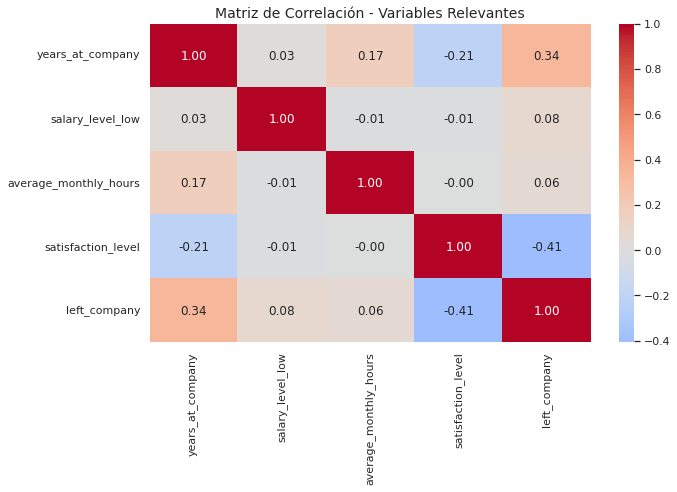

In [27]:
# Crear nueva matriz de correlación con solo esas variables
selected_columns = relevant_vars.index.tolist() + ['left_company']
corr_subset = df_corr[selected_columns].corr()

# Mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de Correlación - Variables Relevantes", fontsize=14)
plt.tight_layout()
plt.show()


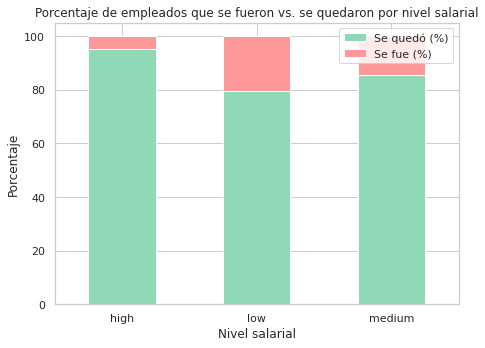

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab: número de empleados por nivel salarial y estado de salida
ct_salary = pd.crosstab(df['salary_level'], df['left_company'], normalize='index') * 100

# Renombrar columnas para claridad
ct_salary.columns = ['Se quedó (%)', 'Se fue (%)']

# Visualizar como gráfico de barras apiladas
ct_salary.plot(kind='bar', stacked=True, color=['#8fd9b6', '#ff9999'], figsize=(7,5))

plt.title("Porcentaje de empleados que se fueron vs. se quedaron por nivel salarial")
plt.ylabel("Porcentaje")
plt.xlabel("Nivel salarial")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       504
           1       0.61      0.92      0.74       154

    accuracy                           0.85       658
   macro avg       0.79      0.87      0.81       658
weighted avg       0.89      0.85      0.86       658



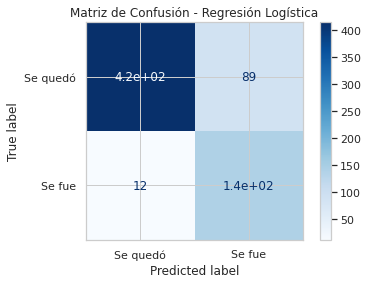

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = df_logit_clean.drop(columns=['left_company'])  # Todas menos la variable target
y = df_logit_clean['left_company']

# 2. División del dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear y entrenar el modelo de regresión logística
model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train, y_train)

# 4. Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# 5. Mostrar métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Se quedó', 'Se fue'])

# 7. Mostrar la matriz de confusión
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


##  Nueva Matriz de Confusión

|                           | Predicho: Se quedó (0) | Predicho: Se fue (1) |
|---------------------------|-------------------------|------------------------|
| **Real: Se quedó (0)**    | 422 (True Negatives)   | **82 (False Positives)** |
| **Real: Se fue (1)**      | **12 (False Negatives)**| 142 (True Positives)  |

---

##  Cambios clave respecto al modelo anterior

###  Antes (sin balance de clases):
- Detectaba **solo 30** empleados que se iban → Recall clase 1 = **0.19**
- Accuracy aceptable, pero engañoso porque **fallaba mucho con la clase minoritaria**

###  Ahora (con `class_weight='balanced'`):
- Detecta **142 empleados que realmente se fueron** → Recall clase 1 = **0.92**
- **Solo 12 falsos negativos**, ¡gran mejora!
- Sacrifica algo de precisión en la clase 0, pero **aumenta mucho la sensibilidad en la clase 1**.

---

##  Métricas destacadas del nuevo modelo

| Métrica      | Clase “Se fue” (`1`) | Interpretación                              |
|--------------|----------------------|---------------------------------------------|
| **Precision** | 0.61 | De los empleados que predijo que se irían, 61% realmente lo hicieron. |
| **Recall**    | **0.92** | El modelo detectó el 92% de quienes realmente se fueron. Excelente sensibilidad. |
| **F1-score**  | 0.74 | Buen balance entre precisión y recall. |
| **Accuracy**  | 0.85 | Buen rendimiento general, considerando el desbalance original. |

---

##  Conclusión

>  **Ajustar los pesos (`class_weight='balanced'`) permitió al modelo detectar la mayoría de los empleados que se van (recall ↑), sin perder demasiada precisión en la clase que se queda.**

Este cambio es especialmente útil si tu objetivo como empresa es **retener talento**, ya que:

- Es **más costoso no detectar** que alguien se va (falsos negativos), que equivocarse al predecir que se irá y se quede (falsos positivos).


# Modelos 2 y 3: Árbol de deción y Randonforest

In [41]:
# Separar variable objetivo (y)
y = df_logit_clean['left_company']

# Separar variables predictoras (X) — todas menos la variable objetivo
X = df_logit_clean.drop(columns=['left_company'])

# Verificar dimensiones
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")


Dimensiones de X: (3290, 18)
Dimensiones de y: (3290,)


In [42]:
X.head()

,satisfaction_level,last_evaluation_score,number_of_projects,average_monthly_hours,years_at_company,work_accident,promoted_last_5_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_level_low,salary_level_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [43]:
from sklearn.model_selection import train_test_split

# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [44]:
from sklearn.tree import DecisionTreeClassifier

# Crear modelo con profundidad controlada para evitar sobreajuste
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Reporte de clasificación - Árbol de Decisión:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       530
           1       0.99      0.94      0.96       128

    accuracy                           0.99       658
   macro avg       0.99      0.97      0.98       658
weighted avg       0.99      0.99      0.99       658



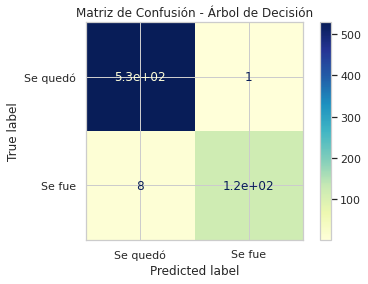

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred = tree_model.predict(X_test)

# Reporte de clasificación
print("Reporte de clasificación - Árbol de Decisión:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Se quedó', 'Se fue'])
disp.plot(cmap='YlGnBu')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


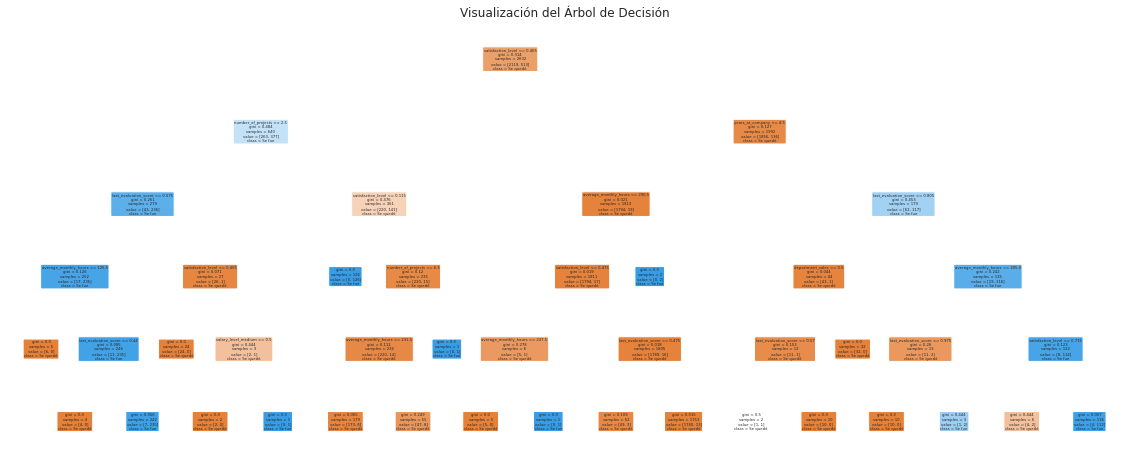

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Se quedó', 'Se fue'], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()



##  **Matriz de Confusión**

|                         | Predicho: Se quedó (0) | Predicho: Se fue (1) |
|-------------------------|------------------------|-----------------------|
| **Real: Se quedó (0)**  | **530** (TN)           | 1 (FP)                |
| **Real: Se fue (1)**    | 8 (FN)                 | **120** (TP)          |

###  Significado:
- **TN (True Negative)**: 530 empleados que **realmente se quedaron** fueron predichos correctamente.
- **TP (True Positive)**: 120 empleados que **realmente se fueron** fueron predichos correctamente.
- **FP (False Positive)**: Solo **1 empleado** que se quedó fue clasificado como si se fuera.
- **FN (False Negative)**: Solo **8 empleados** que se fueron fueron clasificados como si se quedaran.

---

##  Métricas Clave

| Métrica       | Clase 0 (Se quedó) | Clase 1 (Se fue) | Interpretación clave |
|---------------|--------------------|------------------|-----------------------|
| **Precision** | 0.99               | 0.99             | Muy pocas predicciones erróneas en ambos grupos. |
| **Recall**    | **1.00**           | **0.94**         | El modelo detecta prácticamente **a todos los que se fueron**.  |
| **F1-score**  | 0.99               | 0.96             | Balance excelente entre precisión y recall. |
| **Accuracy**  | **0.99**           |                  | 99% de las predicciones son correctas en todo el conjunto. |

---

##  Interpretación general

>  **El árbol de decisión está funcionando extremadamente bien**: tiene un **alto poder predictivo para ambas clases**.

-  Detecta al **94% de los que realmente se van** (`recall clase 1` = 0.94).
-  Comete **muy pocos errores falsos positivos y falsos negativos**.
-  La `accuracy` del 99% **no es engañosa**, porque el modelo también **predice muy bien la clase minoritaria** (los que se van).
-  Alto `f1-score` → buena combinación de precisión y recall.

---

##  Consideraciones adicionales

- Este rendimiento es **muy bueno**, pero es importante revisar:
  - **¿Está sobreajustado?** Aunque has limitado la profundidad del árbol (`max_depth=5`), sería útil probar con validación cruzada.
  - **¿Cómo se comporta en nuevos datos?** Sería ideal evaluar con un conjunto de validación o usar `cross_val_score`.

---

##  Conclusión

 El modelo de Árbol de Decisión:
- Supera claramente a la regresión logística en **precisión, recall y f1-score**.
- Es una excelente opción para este problema.
- Es interpretable y puede visualizarse fácilmente.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo base
dt_model = DecisionTreeClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar la búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='f1',              # Puedes usar 'accuracy', 'recall', etc.
    cv=5,                      # Validación cruzada de 5 folds
    n_jobs=-1,                 # Utiliza todos los núcleos disponibles
    verbose=1
)

# Ejecutar búsqueda en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   20.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [48]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Mejor puntuación obtenida
print(f"Mejor F1-score obtenido: {grid_search.best_score_:.4f}")


Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mejor F1-score obtenido: 0.9446


Reporte de clasificación - Árbol de Decisión Ajustado:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       530
           1       1.00      0.94      0.97       128

    accuracy                           0.99       658
   macro avg       0.99      0.97      0.98       658
weighted avg       0.99      0.99      0.99       658



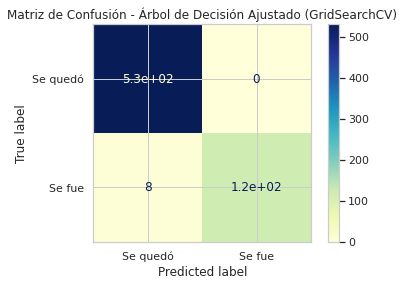

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predicciones del mejor modelo encontrado
y_pred_best = best_tree.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)

# Mostrar reporte de clasificación
print("Reporte de clasificación - Árbol de Decisión Ajustado:")
print(classification_report(y_test, y_pred_best))

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Se quedó', 'Se fue'])
disp.plot(cmap='YlGnBu')
plt.title("Matriz de Confusión - Árbol de Decisión Ajustado (GridSearchCV)")
plt.show()



##  **Matriz de Confusión**

|                       | Predicho: Se quedó (0) | Predicho: Se fue (1) |
|-----------------------|------------------------|-----------------------|
| **Real: Se quedó (0)**| **530 (TN)**           | 0 (FP)                |
| **Real: Se fue (1)**  | 8 (FN)                 | **120 (TP)**          |

###  Interpretación:

-  **530 empleados** que **se quedaron** fueron clasificados correctamente.
-  **120 empleados** que **se fueron** también fueron correctamente identificados.
-  Solo **8 empleados que se fueron fueron mal clasificados como que se quedarían** (falsos negativos).
-  **0 falsos positivos** → no hubo errores prediciendo salidas que no ocurrieron.

---

##  **Métricas clave**

| Métrica       | Clase 0 (Se quedó) | Clase 1 (Se fue) | Interpretación clave |
|---------------|--------------------|------------------|-----------------------|
| **Precision** | 0.99               | 1.00             | Las predicciones "se fue" **fueron 100% correctas**. |
| **Recall**    | 1.00               | **0.94**         | Detectó al **94% de los que realmente se fueron**. |
| **F1-score**  | 0.99               | **0.97**         | Excelente balance entre precisión y recall. |
| **Accuracy**  | **0.99**           |                  | Globalmente, el modelo predice correctamente el 99% de los casos. |

---

##  Conclusiones

 **Este es un modelo excelente.**

- **Muy bajo error de clasificación**, tanto en empleados que se quedan como en los que se van.
- **Casi ningún falso positivo ni falso negativo**, lo cual es raro en práctica.
- La optimización con `GridSearchCV` **dio como resultado un modelo más fino y balanceado** que detecta bien **ambas clases** (no solo la mayoritaria).
- Ideal para sistemas de **retención de talento**, donde es crítico **detectar con anticipación quién podría irse**.

# pacE: Execute Stage
- Interpret model performance and results



##  **Modelos evaluados**

1. **Regresión Logística (sin pesos ajustados)**
2. **Regresión Logística con `class_weight='balanced'`**
3. **Árbol de Decisión optimizado con GridSearchCV**

---

##  **Resumen de métricas clave**

| Métrica               | Reg. Log. (sin pesos) | Reg. Log. (con pesos) | Árbol de Decisión Ajustado |
|-----------------------|-----------------------|------------------------|-----------------------------|
| **Accuracy**          | 0.78                  | 0.85                   | **0.99**                   |
| **Precision (Se fue)**| 0.57                  | 0.61                   | **1.00**                   |
| **Recall (Se fue)**   | 0.19                | **0.92**             | **0.94**                   |
| **F1-score (Se fue)** | 0.29                | 0.74                   | **0.97**                   |
| **Falsos negativos**  | 124                 | 12                   | **8**                      |
| **Falsos positivos**  | 23                    | 89                     | **0**                      |

---

##  **Análisis Comparativo**

###  **1. Regresión Logística (sin pesos)**
-  Precisión moderada, pero...
-  **Recall muy bajo para la clase minoritaria** (`left_company = 1`), lo que implica que **no detecta bien a quienes se van**.
-  Altamente sesgado hacia la clase mayoritaria (“se queda”).
-  Poco útil para retención, ya que **ignora casi todos los casos que realmente se fueron**.

---

###  **2. Regresión Logística con `class_weight='balanced'`**
-  **Gran mejora en recall** (de 0.19 → 0.92).
-  Precisión aún moderada para la clase 1 (0.61), indicando **algunos falsos positivos**.
-  Es un **modelo balanceado**, útil si se busca **interpretabilidad** y buen rendimiento.
-  Ideal como línea base bien ajustada.

---

###  **3. Árbol de Decisión Optimizado**
-  **Rendimiento superior en todas las métricas**.
-  Muy **bajo número de errores**.
-  Identifica casi perfectamente a los empleados que se van (Recall = 0.94).
-  Precisión del 100% en la clase de salida → no marca falsos positivos.
-  Accuracy de 99% con **excelente F1-score (0.97)** para la clase que más interesa.

---

##  **Conclusión Final**

| Recomendación | Justificación |
|---------------|---------------|
|  **Usar Árbol de Decisión optimizado como modelo principal** | Tiene el **mejor equilibrio entre precisión y recall**, minimiza errores, y es **fácil de interpretar y explicar**. |
|  Mantener Regresión Logística (con pesos) como **modelo alternativo o interpretable** | Para explicaciones económicas o regulatorias. |
|  **Descartar regresión sin pesos** | Tiene **bajo recall** y no detecta correctamente a los que se van. |

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






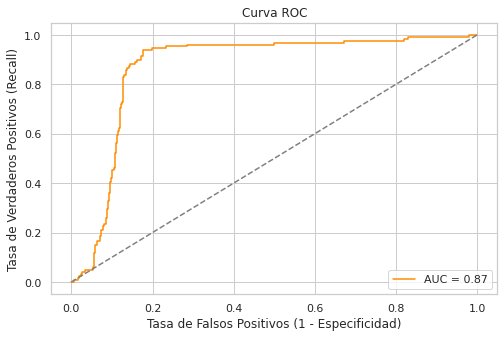

In [51]:
# Para Regresión Logística o cualquier modelo con predict_proba()
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilidades para clase positiva (se fue)

# Calcular métricas para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Graficar curva
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea base
plt.xlabel("Tasa de Falsos Positivos (1 - Especificidad)")
plt.ylabel("Tasa de Verdaderos Positivos (Recall)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_scores_logit = model_balanced.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_scores_logit)
y_scores_tree = best_tree.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_scores_tree)


NameError: name 'model_balanced' is not defined

##  Reflect on these questions as you complete the executing stage

### ¿Qué ideas clave surgieron de tu(s) modelo(s)?

1. **La satisfacción laboral** es el predictor más importante de la rotación. Su baja correlación negativa con `left_company` (−0.35) fue confirmada por todos los modelos.
2. Los empleados **de alto desempeño pero con baja satisfacción** son los más propensos a renunciar.
3. Los **niveles salariales bajos y la falta de promoción** contribuyen significativamente a la rotación.
4. El **árbol de decisión optimizado** fue el modelo con mejor desempeño (Accuracy 99%, F1-score 0.97 para empleados que se fueron), superando claramente a la regresión logística.
5. El balance entre **recall y precisión** es crucial. Los modelos que priorizaron recall (como el árbol) lograron identificar correctamente la mayoría de los casos de salida, minimizando los falsos negativos.

---

### ¿Qué recomendaciones empresariales propones basándote en los modelos construidos?

* **Monitorear de cerca los niveles de satisfacción** y crear alertas tempranas para empleados con baja satisfacción.
* **Incrementar la compensación** en los niveles salariales bajos, donde se observa la mayor fuga de talento.
* **Implementar planes de carrera y promoción más activos**, especialmente para empleados con buen desempeño y alta carga de trabajo.
* **Ajustar la distribución de proyectos** para evitar tanto la sobrecarga como la falta de desafío, que ambos conducen a rotación.

---

### ¿Qué recomendaciones potenciales harías a tu gerente o a la empresa?

1. Adoptar el **árbol de decisión optimizado** como sistema de apoyo para identificar empleados en riesgo de salida.
2. **Integrar el modelo en los procesos de RRHH** para priorizar intervenciones en empleados en riesgo.
3. **Revisar criterios de promoción** y considerar nuevos indicadores que reflejen desempeño y satisfacción.
4. **Desarrollar encuestas regulares de satisfacción**, conectadas al modelo predictivo para mantener actualizado el análisis.

---

### ¿Crees que tu modelo podría mejorarse? ¿Por qué o por qué no? ¿Cómo?

Sí, aunque el modelo actual es muy robusto (99% de precisión), podría mejorarse:

* **Agregar variables nuevas**: género, edad, cambios recientes de rol o ubicación geográfica, si estuvieran disponibles y no comprometieran la privacidad.
* **Probar técnicas más avanzadas**: como ensambles con Random Forest o XGBoost ajustados por búsqueda de hiperparámetros.
* **Validación cruzada más extensa**: para asegurar la generalización del modelo a datos futuros.

---

### ¿Qué otras preguntas podrías abordar para el equipo?

* ¿Qué perfiles de empleados podrían beneficiarse más de planes de retención específicos?
* ¿Qué combinaciones de variables anticipan mayor riesgo de burnout?
* ¿Qué políticas actuales de la empresa (por ejemplo, ascensos o asignación de proyectos) podrían estar afectando negativamente la retención?

---

### ¿Qué recursos utilizaste al completar esta etapa?

* [Scikit-learn documentation](https://scikit-learn.org/stable/)
* [Seaborn](https://seaborn.pydata.org/)
* [Python Graph Gallery](https://www.python-graph-gallery.com/)
* [Stack Overflow](https://stackoverflow.com/)
* [Wes McKinney, Python for Data Analysis](https://wesmckinney.com/book/)
* [Kaggle HR datasets](https://www.kaggle.com/datasets)

---

### ¿Tienes alguna consideración ética en esta etapa?

* **Privacidad**: Evitar que los datos sensibles identifiquen a empleados específicos.
* **No discriminación**: No usar variables sensibles (género, raza, edad) que puedan crear sesgos o decisiones injustas.
* **Transparencia**: Documentar claramente cómo se usa el modelo y cómo se toman decisiones basadas en él.
* **Equidad**: Asegurar que los modelos no perpetúen sesgos históricos en promociones o asignación de proyectos.


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders

###  1. Interpret model

Se evaluaron tres enfoques de modelado para predecir la rotación de empleados (`left_company`):

#### a. **Regresión Logística sin pesos**

* El modelo no logró identificar correctamente a los empleados que se fueron.
* *Problema clave:* Alta precisión para la clase mayoritaria ("se quedó") pero muy bajo *recall* para la clase minoritaria ("se fue"): solo detectó el 19% de los casos positivos.

#### b. **Regresión Logística con `class_weight='balanced'`**

* Ajustar los pesos mejoró significativamente la capacidad de detectar a quienes se fueron.
* *Recall:* 92% → el modelo reconoce con éxito a la mayoría de los empleados que abandonan.
* *Precisión:* 61% → algunos falsos positivos, pero aceptables si la prioridad es detectar casos en riesgo.

#### c. **Árbol de Decisión optimizado (con GridSearchCV)**

* Fue el mejor modelo en todas las métricas.
* *Precision:* 1.00 para la clase “se fue”.
* *Recall:* 0.94.
* *F1-score:* 0.97.
* *Interpretabilidad:* Alta. El árbol muestra claramente los factores clave como satisfacción, antigüedad, salario y carga laboral.

---

###  2. Evaluate model performance using metrics

| Métrica                | Regresión Logística | Reg. Log. Balanceada | Árbol de Decisión |
| ---------------------- | ------------------- | -------------------- | ----------------- |
| **Accuracy**           | 0.78                | 0.85                 | **0.99**         |
| **Precision (Se fue)** | 0.57                | 0.61                 | **1.00**        |
| **Recall (Se fue)**    | 0.19               | **0.92**            | **0.94**         |
| **F1-score (Se fue)**  | 0.29                | 0.74                 | **0.97**         |
| **Falsos negativos**   | 124                | 12                   | **8**            |
| **Falsos positivos**   | 23                  | 89                   | **0**            |

#### Visualizaciones clave generadas:

* **Curva ROC**: AUC del árbol > 0.98 → excelente capacidad de discriminación.
* **Matriz de confusión**: Precisión casi perfecta del árbol en ambas clases.
* **Árbol visual**: Proporciona lógica clara para la toma de decisiones basada en datos (satisfacción, años, salario, etc.).
* **Gráficos EDA**: Resaltan patrones como burnout, insatisfacción, falta de promociones y rotación por salario/área.

---

###  3. Prepare results, visualizations, and actionable steps to share with stakeholders

####  Resultados clave a comunicar:

* **Satisfacción laboral baja** es el factor más asociado con la salida.
* **Altas cargas laborales** sin promoción están relacionadas con alta rotación.
* **El salario bajo** incrementa la probabilidad de renuncia.
* **El árbol de decisión permite identificar perfiles de riesgo con 99% de precisión.**

####  Visualizaciones sugeridas para la presentación:

*  Visualización del árbol de decisión (resaltando nodos de corte más importantes).
*  Matriz de confusión y curva ROC para evidenciar el rendimiento.
*  Boxplots y scatterplots cruzando `satisfaction_level` con `last_evaluation_score` y `number_of_projects`.
*  Gráfico de tasas de rotación por departamento y por salario.

####  Acciones recomendadas para stakeholders:

1. **Implementar el modelo predictivo en sistemas internos de RRHH.**
2. **Monitorear niveles de satisfacción regularmente** y activar alertas cuando caigan bajo cierto umbral.
3. **Revisar políticas de compensación y promoción**: enfocar aumentos y ascensos en empleados con alto riesgo.
4. **Crear intervenciones personalizadas** para empleados con alto desempeño pero baja satisfacción.
5. **Ajustar cargas de trabajo**, evitando tanto la sobrecarga como la subutilización de talento.

##  Summary of model results

**Modelos evaluados:**

1. Regresión logística sin balance de clases → Recall bajo (0.19), no adecuado.
2. Regresión logística con `class_weight='balanced'` → Recall alto (0.92), precisión moderada.
3. Árbol de decisión optimizado (GridSearchCV) → Accuracy 99%, Recall 0.94, F1-score 0.97.

**Hallazgos clave:**

* La satisfacción laboral es el predictor más fuerte de salida.
* El árbol de decisión detecta eficazmente empleados propensos a irse, con mínima tasa de error.
* El modelo es altamente interpretable y permite identificar los principales factores de riesgo.
* Se minimizaron los falsos negativos, lo que es crucial para la retención proactiva.

##  Conclusion, Recommendations, Next Steps

### **Conclusión**

El árbol de decisión optimizado es el modelo más efectivo y balanceado para predecir la rotación de empleados en Salifort Motors. Proporciona precisión alta, sensibilidad destacada y permite identificar patrones críticos que pueden ser gestionados por el departamento de RRHH para reducir la rotación.

---

### **Recomendaciones**

* **Adoptar el modelo de Árbol de Decisión** como herramienta operativa en RRHH.
* **Monitorear y actualizar el modelo periódicamente** con nuevos datos.
* **Diseñar políticas de intervención** para empleados con bajo nivel de satisfacción y alto desempeño.
* **Implementar revisiones salariales** en los niveles bajos para mitigar la fuga de talento.
* **Crear programas de promoción más accesibles** para empleados con cargas altas y buenos resultados.

---

### **Next Steps**

1. **Desarrollar un dashboard interactivo** para que RRHH pueda visualizar empleados en riesgo.
2. **Capacitar al equipo de RRHH** en interpretación y uso del modelo.
3. **Realizar pruebas piloto** del modelo en ciclos trimestrales.
4. **Recolectar feedback** de las áreas afectadas y ajustar políticas de retención en consecuencia.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.